Analysis by : Hafizah Ab Rahim

# Question: What are the features that affect used car price?

Approach: Apply statistics to summarize the data concisely with the help of different visualization.

## 1. Data Inspection 

### Import data, check for column names, number of rows columns, data types and special values.

In [2]:
import pandas as pd
name = "Vehicle_Analysis.csv"
df = pd.read_csv(name, header=None)

In [3]:
# Look at the first 5 rows

df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
header_names = ["symbol","normalized_losses","brand","fuel_type",
           "aspiration","doors","body_style","wheels",
           "engine_locations","wheel_base","length","width","height",
           "curb_weight","engine_type","cylinders","engine_size",
           "fuel_system","bore","stroke","compression_ratio",
           "horsepower","peak_rpm","city_mpg","highway_mpg","price"]

In [5]:
# Add names to columns

df.columns = header_names
df.head(10)

,symbol,normalized_losses,brand,fuel_type,aspiration,doors,body_style,wheels,engine_locations,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [6]:
# Look at number of columns, rows and type of each variables.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symbol             205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   brand              205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   doors              205 non-null    object 
 6   body_style         205 non-null    object 
 7   wheels             205 non-null    object 
 8   engine_locations   205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  cylinders          205 non-null    object 
 16  engine_size        205 non

In [7]:
# Look at data statistical descriptions - numeric only

df.describe() 

,symbol,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [8]:
# Look at data statistical descriptions - categorical only

df.describe(include=['O'])

,normalized_losses,brand,fuel_type,aspiration,doors,body_style,wheels,engine_locations,engine_type,cylinders,fuel_system,bore,stroke,horsepower,peak_rpm,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.4,68,5500,?
freq,41,32,185,168,114,96,120,202,148,159,94,23,20,19,37,4


# 2. Data Wrangling 

### Clean the data, replace special values like '?' , zero values, NaN and perform feature engineering

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# replace special values

df.replace("?", np.nan, inplace = True) 
df.head()

,symbol,normalized_losses,brand,fuel_type,aspiration,doors,body_style,wheels,engine_locations,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [11]:
# check for missing values

missing_data = df.isnull().sum()
missing_data.head(26)

symbol                0
normalized_losses    41
brand                 0
fuel_type             0
aspiration            0
doors                 2
body_style            0
wheels                0
engine_locations      0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
cylinders             0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

There are 7 variables with missing values.
All variables will be replaced by mean of each groups except for "doors" and "price". 

In [12]:
# Change data type and calculate mean for normalized_losses. 
# Replace missing data with mean.

avg_norm_loss = df["normalized_losses"].astype("float").mean(axis=0)
print("Average normalized-losses:", avg_norm_loss)
df["normalized_losses"].replace(np.nan, avg_norm_loss, inplace=True)

Average normalized-losses: 122.0


In [13]:
avg_bore = df["bore"].astype("float").mean(axis=0)
print("Average bore:", avg_bore)
df["bore"].replace(np.nan, avg_bore, inplace=True)

Average bore: 3.3297512437810957


In [14]:
avg_stroke = df["stroke"].astype("float").mean(axis=0)
print("Average stroke:",avg_stroke)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)

Average stroke: 3.2554228855721337


In [15]:
avg_horsepower = df["horsepower"].astype("float").mean(axis=0)
print("horsepower:",avg_horsepower)
df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)

horsepower: 104.25615763546799


In [16]:
avg_peakrpm = df["peak_rpm"].astype("float").mean(axis=0)
print("Average peak_rpm:",avg_peakrpm)
df["peak_rpm"].replace(np.nan, avg_peakrpm, inplace=True)

Average peak_rpm: 5125.369458128079


In [17]:
df["doors"].value_counts() 

four    114
two      89
Name: doors, dtype: int64

In [17]:
df["doors"].replace(np.nan,"four", inplace=True)

In [18]:
missing = df.isnull().sum()
missing # check null values again to make sure

symbol               0
normalized_losses    0
brand                0
fuel_type            0
aspiration           0
doors                0
body_style           0
wheels               0
engine_locations     0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
cylinders            0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                4
dtype: int64

In [19]:
df.dropna(subset=["price"],axis=0, inplace = True)

In [20]:
missing = df.isnull().sum()
missing

symbol               0
normalized_losses    0
brand                0
fuel_type            0
aspiration           0
doors                0
body_style           0
wheels               0
engine_locations     0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
cylinders            0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [21]:
df.dtypes

symbol                 int64
normalized_losses     object
brand                 object
fuel_type             object
aspiration            object
doors                 object
body_style            object
wheels                object
engine_locations      object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
cylinders             object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [22]:
df[["bore","stroke"]] = df[["bore","stroke"]].astype("float")
df[["normalized_losses"]] = df[["normalized_losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak_rpm"]] = df[["peak_rpm"]].astype("float")

In [23]:
df.dtypes

symbol                 int64
normalized_losses      int64
brand                 object
fuel_type             object
aspiration            object
doors                 object
body_style            object
wheels                object
engine_locations      object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
cylinders             object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower            object
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

##### Analyze horsepower for further analysis if needed

In [24]:
df[["horsepower"]] = df[["horsepower"]].astype("int")

Text(0.5, 1.0, 'horsepower bins')

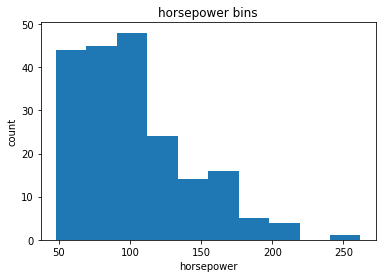

In [25]:
import matplotlib as plt
from matplotlib import pyplot
%matplotlib inline

plt.pyplot.hist(df["horsepower"])
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [26]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [27]:
# group name
group_names = ["Low", "Medium", "High"]
df["horsepower_binned"] = pd.cut(df["horsepower"], bins, labels=group_names, include_lowest=True)

In [28]:
# number of values in each bins
df["horsepower_binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower_binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

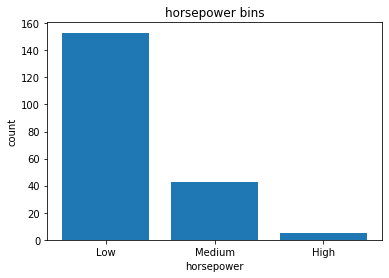

In [29]:
# Bar Plot distribution in  each bin

pyplot.bar(group_names, df["horsepower_binned"].value_counts())
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

##### Change categorical features into numerical values

In [30]:
dummy = pd.get_dummies(df["fuel_type"])
dummy.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [31]:
df = pd.concat([df,dummy], axis=1)

In [32]:
df.head()

,symbol,normalized_losses,brand,fuel_type,aspiration,doors,body_style,wheels,engine_locations,wheel_base,...,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,horsepower_binned,diesel,gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,21,27,13495.0,Low,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,21,27,16500.0,Low,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000.0,19,26,16500.0,Medium,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500.0,24,30,13950.0,Low,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500.0,18,22,17450.0,Low,0,1


In [33]:
df.drop("fuel_type", axis=1, inplace = True)

In [34]:
df.head()

,symbol,normalized_losses,brand,aspiration,doors,body_style,wheels,engine_locations,wheel_base,length,...,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,horsepower_binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000.0,21,27,13495.0,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000.0,21,27,16500.0,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000.0,19,26,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500.0,24,30,13950.0,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500.0,18,22,17450.0,Low,0,1


In [35]:
dummy2 = pd.get_dummies(df["aspiration"])
dummy2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [36]:
df = pd.concat([df,dummy2], axis=1)
df.head()

,symbol,normalized_losses,brand,aspiration,doors,body_style,wheels,engine_locations,wheel_base,length,...,horsepower,peak_rpm,city_mpg,highway_mpg,price,horsepower_binned,diesel,gas,std,turbo
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,111,5000.0,21,27,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,111,5000.0,21,27,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,154,5000.0,19,26,16500.0,Medium,0,1,1,0
3,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,102,5500.0,24,30,13950.0,Low,0,1,1,0
4,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,115,5500.0,18,22,17450.0,Low,0,1,1,0


In [37]:
df.drop("aspiration", axis=1, inplace = True)

In [38]:
df.drop("normalized_losses", axis=1, inplace = True)
df.head()

,symbol,brand,doors,body_style,wheels,engine_locations,wheel_base,length,width,height,...,horsepower,peak_rpm,city_mpg,highway_mpg,price,horsepower_binned,diesel,gas,std,turbo
0,3,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,111,5000.0,21,27,13495.0,Low,0,1,1,0
1,3,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,111,5000.0,21,27,16500.0,Low,0,1,1,0
2,1,alfa-romero,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,154,5000.0,19,26,16500.0,Medium,0,1,1,0
3,2,audi,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,102,5500.0,24,30,13950.0,Low,0,1,1,0
4,2,audi,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,115,5500.0,18,22,17450.0,Low,0,1,1,0


# 3. Exploratary Data Analysis - EDA

## Analyze relationship between features using visualization and Pearson correlation

###  A. Continuous numerical features 

The relationship between continuous numerical variables ("int64" & "float64") can be visualize using scatterplots with fitted lines. The strength of the relationship is determined using Pearson correlation.

In [39]:
import seaborn as sns

##### Feature 1: engine_size

,engine_size,price
engine_size,1.000000,0.872335
price,0.872335,1.000000


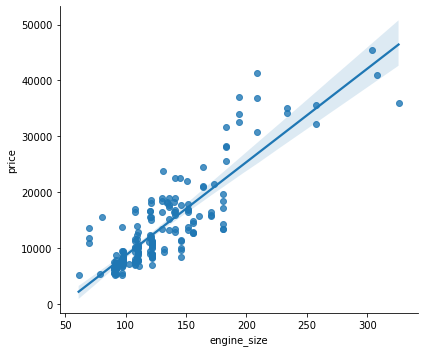

In [40]:
sns.lmplot(x = 'engine_size', y = 'price', data = df, aspect = 1.2, height = 5)
df[["engine_size","price"]].corr() 

# As the engine-size goes up, the price goes up: this indicates a 
# positive direct correlation between these two variables. 
# Engine size is a good predictor of price since the 
# regression line is almost a perfect diagonal line.

##### Feature 2: highway_mpg

,highway_mpg,price
highway_mpg,1.000000,-0.704692
price,-0.704692,1.000000


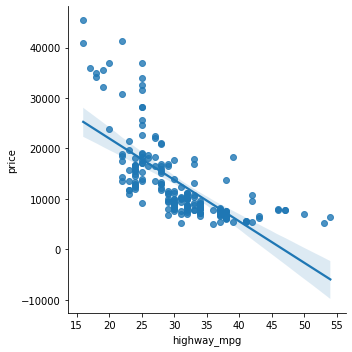

In [41]:
sns.lmplot(x="highway_mpg", y="price", data=df)
df[["highway_mpg", "price"]].corr()

# Good predictor of price with a negative relationship

##### Feature 3: peak_rpm

,peak_rpm,price
peak_rpm,1.000000,-0.101616
price,-0.101616,1.000000


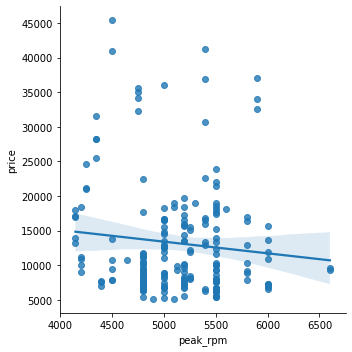

In [42]:
sns.lmplot(x="peak_rpm", y="price", data=df)
df[["peak_rpm","price"]].corr()

# Not a good predictor of the price - regression line is close to 
# horizontal.

##### Feature 4: stroke

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


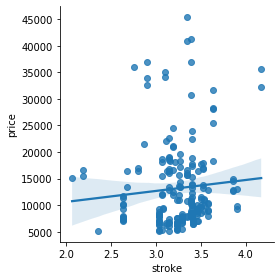

In [43]:
sns.lmplot(x="stroke", y="price", data=df, height = 4)
df[["stroke", "price"]].corr()

# Not a good predictor of the price

##### Feature 5: length

,length,price
length,1.000000,0.690628
price,0.690628,1.000000


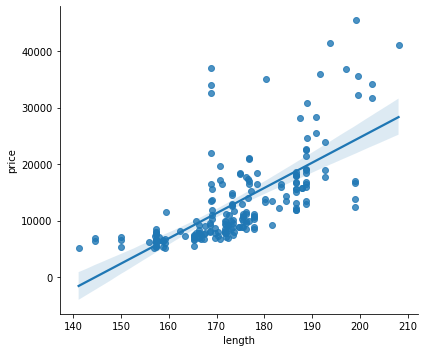

In [44]:
sns.lmplot(x = 'length', y = 'price', data = df, aspect = 1.2, height = 5)
df[["length", "price"]].corr()

# Good predictor of price

##### Feature 6: width

,width,price
width,1.000000,0.751265
price,0.751265,1.000000


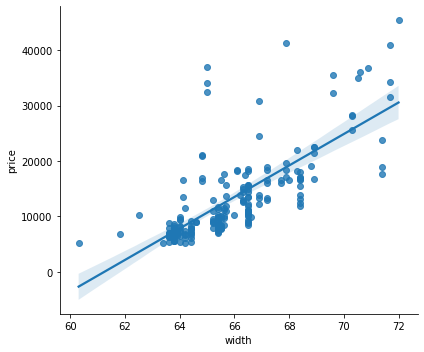

In [45]:
sns.lmplot(x = 'width', y = 'price', data = df, aspect = 1.2, height = 5)
df[["width", "price"]].corr()

# Good predictor of price

##### Feature 7: height

,height,price
height,1.000000,0.135486
price,0.135486,1.000000


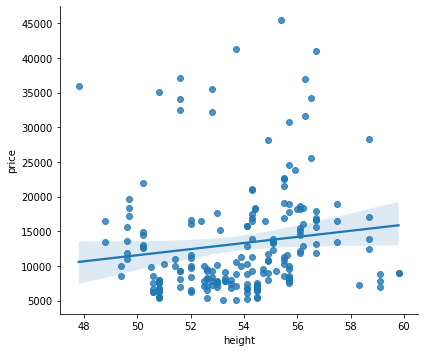

In [46]:
sns.lmplot(x = 'height', y = 'price', data = df, aspect = 1.2, height = 5)
df[["height", "price"]].corr()

# Not a good predictor of the price

##### Feature 8: wheel_base

,wheel_base,price
wheel_base,1.000000,0.584642
price,0.584642,1.000000


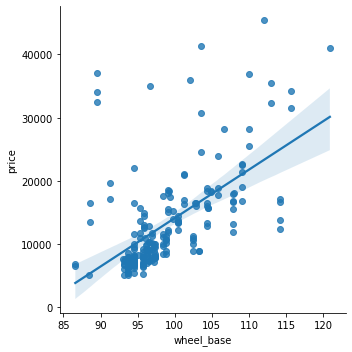

In [47]:
sns.lmplot(x="wheel_base", y="price", data=df)
df[["wheel_base", "price"]].corr()

# Good predictor of price

##### Feature 9: curb_weight

,curb_weight,price
curb_weight,1.000000,0.834415
price,0.834415,1.000000


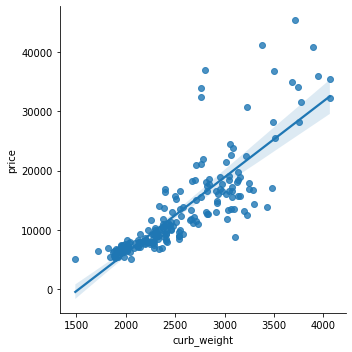

In [48]:
sns.lmplot(x="curb_weight", y="price", data=df)
df[["curb_weight", "price"]].corr()

# Good predictor of price

##### Feature 10: bore

,bore,price
bore,1.000000,0.543155
price,0.543155,1.000000


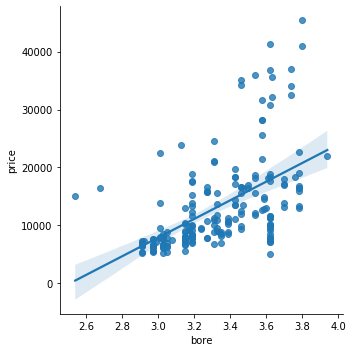

In [49]:
sns.lmplot(x="bore", y="price", data=df)
df[["bore", "price"]].corr()

# Good predictor of price

##### Feature 11: compression_ratio

,compression_ratio,price
compression_ratio,1.000000,0.071107
price,0.071107,1.000000


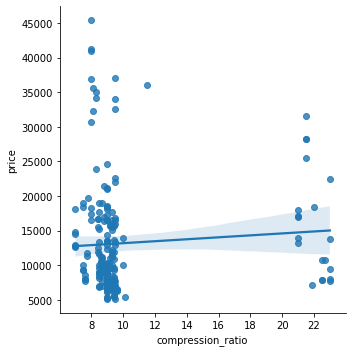

In [50]:
sns.lmplot(x="compression_ratio", y="price", data=df)
df[["compression_ratio", "price"]].corr()

# Not a good predictor of price

##### Feature 12: city_mpg

,city_mpg,price
city_mpg,1.000000,-0.686571
price,-0.686571,1.000000


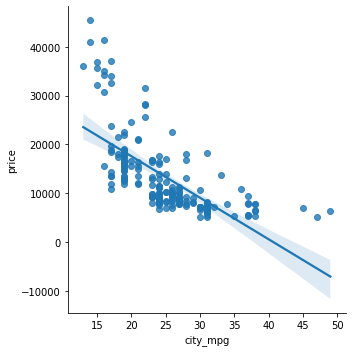

In [51]:
sns.lmplot(x="city_mpg", y="price", data=df)
df[["city_mpg", "price"]].corr()

# Good predictor of price

,horsepower,price
horsepower,1.000000,0.809607
price,0.809607,1.000000


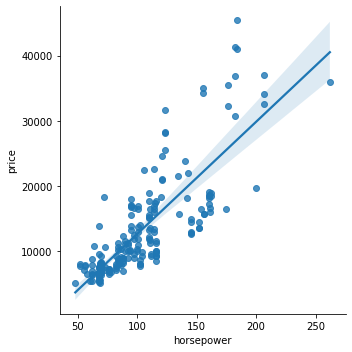

In [52]:
sns.lmplot(x="horsepower", y="price", data=df)
df[["horsepower", "price"]].corr()

# Good predictor of price

### B. Categorical Feature 

The relationship between categorical variables ("object") can be visualize using boxplots.

##### Feature 13: body_style

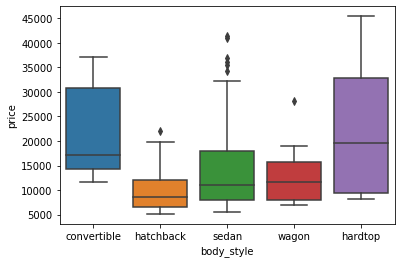

In [53]:
sns.boxplot(x="body_style", y="price", data=df)

# Not a good predictor - The distributions of price between the 
# different body-style have a significant overlap.

##### Feature 14: engine_locations

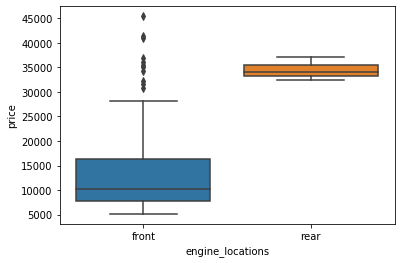

In [54]:
sns.boxplot(x="engine_locations", y="price", data=df)

# Good predictor of price - distinct price distribution

##### Feature 15: wheels

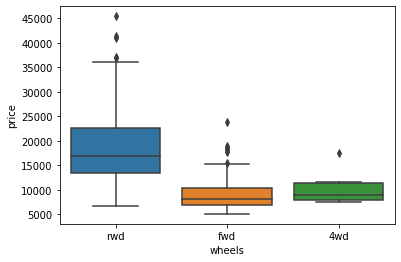

In [55]:
sns.boxplot(x="wheels", y="price", data=df)

# A good predictor of price - distinct price distribution between 
# rwd and other categories.

##### Feature 16: fuel_system

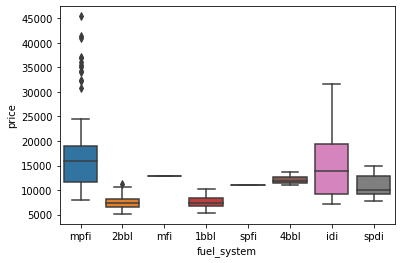

In [56]:
sns.boxplot(x="fuel_system", y="price", data=df)

# Not a good predictor - The distributions of price between the 
# different body-style have a significant overlap.

##### Feature 17: engine_type

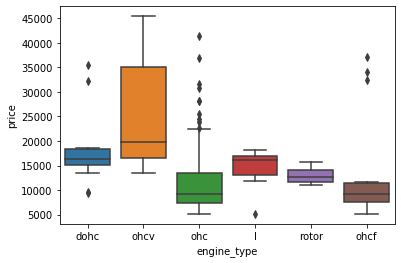

In [57]:
sns.boxplot(x="engine_type", y="price", data=df)

# Not a good predictor - The distributions of price between the 
# different body-style have a significant overlap.

##### Feature 18: doors

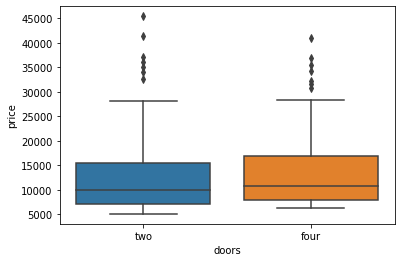

In [58]:
sns.boxplot(x="doors", y="price", data=df)

# Not a good predictor - The distributions of price between the 
# different body-style have a significant overlap.

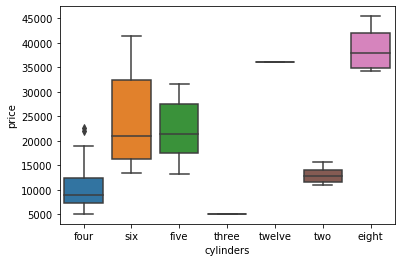

In [59]:
sns.boxplot(x="cylinders", y="price", data=df)

# A good predictor of price 

### P value 
Check the probablility value for given pearson coefficient of the feature

In [60]:
from scipy import stats

In [61]:
pearson_coef, p_value = stats.pearsonr(df["wheel_base"],df["price"])
pearson_coef, p_value
# Since the p-value is <0.001, the correlation between wheel_base and 
# price is statistically significant, and the linear relationship is 
# quite strong (~0.809, close to 1)

(0.584641822265508, 8.076488270733218e-20)

In [62]:
from scipy import stats
p_value = stats.pearsonr(df["horsepower"],df["price"])
p_value

# Since the p-value is <0.001, the correlation is statistically 
# significant

(0.8096068016571054, 6.273536270650504e-48)

In [63]:
pearson_coef, p_value = stats.pearsonr(df["city_mpg"],df["price"])
pearson_coef, p_value

# Since the p-value is <0.001, the correlation is statistically 
# significant

(-0.6865710067844677, 2.321132065567674e-29)

In [64]:
pearson_coef, p_value = stats.pearsonr(df["highway_mpg"],df["price"])
pearson_coef, p_value

# Since the p-value is <0.001, the correlation is statistically 
# significant

(-0.7046922650589529, 1.7495471144477352e-31)

In [65]:
pearson_coef, p_value = stats.pearsonr(df["length"],df["price"])
pearson_coef, p_value

# Since the p-value is <0.001, the correlation is statistically 
# significant

(0.6906283804483642, 8.016477466158759e-30)

In [66]:
pearson_coef, p_value = stats.pearsonr(df["width"],df["price"])
pearson_coef, p_value

# Since the p-value is <0.001, the correlation is statistically 
# significant

(0.7512653440522672, 9.20033551048217e-38)

In [67]:
pearson_coef, p_value = stats.pearsonr(df["curb_weight"],df["price"])
pearson_coef, p_value

# Since the p-value is <0.001, the correlation is statistically 
# significant

(0.8344145257702846, 2.1895772388936914e-53)

In [68]:
pearson_coef, p_value = stats.pearsonr(df["engine_size"],df["price"])
pearson_coef, p_value

# Since the p-value is <0.001, the correlation is statistically 
# significant

(0.8723351674455185, 9.265491622198389e-64)

In [69]:
pearson_coef, p_value = stats.pearsonr(df["bore"],df["price"])
pearson_coef, p_value

# Since the p-value is <0.001, the correlation is statistically 
# significant

(0.5431553832626602, 8.049189483935489e-17)

### Conclusion

After applying statistical analysis and visualization, the following feature affect the price of used cars.

#### Continuous numerical variables:
length,
width,
curb-weight,
engine-size,
horsepower,
city-mpg,
highway-mpg,
wheel-base,
bore


#### Categorical variables:
wheels, cylinders

##### More analysis will be done in the near future.